I am looking at the data from CleverCogs. Clevercogs is an iPad app for people in residental care homes (elderly people and people with disabitiles). 
There are three dataset files. One containing infomation about the users (Users2021.csv), one containing information about their health condition (CustomerMedicalConditions04Nov21.csv) and one containing informtaion about how they used the app, e.g. when and what they used it for (CCDate20218-2021)

For the purpose of this assignment, I will focus on the health condition data, and a little later on, the Users data.


1. Start of Describe Section 

In [7]:
import pandas as pd   ##### First I read in the data
data = pd.read_csv("CustomerMedicalConditions04Nov21.csv")
print(data.head())  

  External ID  CleverCogsUserId Gender DateOfBirth   Age StaffPlanConditions  \
0        4703               685      F  04/07/1965  56.0                 NaN   
1        4704               772      F  21/06/1940  81.0                 NaN   
2        4706              1128      F  25/02/1931  90.0                 NaN   
3        4707              1159      F  18/09/1982  39.0                 NaN   
4        4708               784      F  20/12/1931  90.0                 NaN   

  CareSysCondition  
0     Spina Bifida  
1             COPD  
2         Dementia  
3     Brain Injury  
4              NaN  


In [8]:
data.describe()  ##Here I have a quick look at the data to get an overview. 

,CleverCogsUserId,Age
count,1311.000000,1310.000000
mean,2880.036613,72.752672
std,1671.725423,21.509496
min,0.000000,3.000000
25%,1519.500000,57.000000
50%,2392.000000,77.000000
75%,4798.500000,89.000000
max,5679.000000,121.000000


The data is in tabular format. 

In [9]:
data.shape

(1311, 7)

In [10]:
print(data.dtypes)  

External ID             object
CleverCogsUserId         int64
Gender                  object
DateOfBirth             object
Age                    float64
StaffPlanConditions     object
CareSysCondition        object
dtype: object


The data is object types and floating numbers.

Now I will clean the data and become more familiar with it. 

In [11]:
del data['CleverCogsUserId'] #### Here I delete this column as the provider of the data said it was useless. 

The data in this file is highly personal and sensitive given the vulnerabilty of the people in this service. It also contains information about their health conditions. For this reason there are user id column and an external Id column. I will use the external ID column for this assigment.

In [12]:
data.CareSysCondition.unique() ##Here I have a look at the types of health conditions people have

array(['Spina Bifida', 'COPD', 'Dementia', 'Brain Injury', nan,
       'Elderly Care/Support', 'Cerebral Palsy', 'Epilepsy',
       'Multiple Sclerosis', 'Diabetes', 'Amputee',
       'Learning Difficulties', 'Stroke', 'Visual Impairment',
       'Arthritis', "Huntington's", 'Parkinsons', 'Down Syndrome',
       'Progressive Supranuclear Palsy', 'Bi Polar Disorder',
       'Lifelong Mobility Issues', 'Spinal Injury', 'Asthma',
       'Muscular Dystrophy', 'Cerebellar Ataxia', 'Cancer',
       'Mental Health Issues', 'OCD', 'Addiction Issues'], dtype=object)

In [13]:
len(data.CareSysCondition.unique())#### There are 29 categories of health conditions

29

When I eyeball the data, I notice a lot of the StaffPlanConditions column is empty. It seems to 
contain the names of plans disabled person may need. I check how much of this column is empty. 


In [14]:
data["StaffPlanConditions"].isna().sum()   

1161

I notice a lot of this column is missing (1161 out of 1311). Perhaps adding a person's health plan is only a very recent practice within the services. I will delete this column as it does not seem to be able to provide much useful information on its own.

However, then I thought, it could be useful if it is the *only* piece of information we have about an individual's health problems i.e. if the CareSysCondition column is empty. For this reason, when there is missing data in the CareSysCondition column, I decide to replace it with the data in the StaffPlanCondition column. This way, there will still be an indicator for what the individual's health problems are. 

In [15]:
data.CareSysCondition.fillna(data.StaffPlanConditions, inplace=True)  
del data['StaffPlanConditions']


#### Here, I fill NA object in the StaffPlanConditions condtions with the information in the
#CareSysCondition column. Then I delete the StaffPlanConditions column as it has no other purpose at this time. 

In [16]:
data.CareSysCondition.unique()  ##Here, I check the new levels of the CareSysCondition column 

array(['Spina Bifida', 'COPD', 'Dementia', 'Brain Injury', nan,
       'Elderly Care/Support', 'Cerebral Palsy', 'Epilepsy',
       'Multiple Sclerosis', 'Diabetes', 'Amputee',
       'Learning Difficulties', 'Stroke', 'Visual Impairment',
       'Arthritis', "Huntington's", 'Parkinsons', 'Down Syndrome',
       'Progressive Supranuclear Palsy', 'Bi Polar Disorder',
       'Lifelong Mobility Issues', 'Spinal Injury', 'Asthma',
       'Muscular Dystrophy', 'Cerebellar Ataxia', 'Cancer',
       'Motor Neurone                                     ',
       'Osteoporosis                                      ',
       'Dementia                                          ',
       'Mental Health Issues', 'OCD', 'Addiction Issues',
       'Prone to Falls                                    ',
       'Stroke                                            ',
       'Multiple Sclerosis                                '], dtype=object)

I noticed some of the objects had large white spaces, e.g. "Stroke       "  and this was preventing it from being grouped with the other "Stroke". These are the items I filled with the StaffPlanConditions cells. 

In the code below, I removed leading and trailing white spaces 

In [17]:
data['CareSysCondition'] = data['CareSysCondition'].str.strip()
## I remove leading and trailing white spaces 

data.CareSysCondition.unique() ##Then I check the levels again. They look good now.   

array(['Spina Bifida', 'COPD', 'Dementia', 'Brain Injury', nan,
       'Elderly Care/Support', 'Cerebral Palsy', 'Epilepsy',
       'Multiple Sclerosis', 'Diabetes', 'Amputee',
       'Learning Difficulties', 'Stroke', 'Visual Impairment',
       'Arthritis', "Huntington's", 'Parkinsons', 'Down Syndrome',
       'Progressive Supranuclear Palsy', 'Bi Polar Disorder',
       'Lifelong Mobility Issues', 'Spinal Injury', 'Asthma',
       'Muscular Dystrophy', 'Cerebellar Ataxia', 'Cancer',
       'Motor Neurone', 'Osteoporosis', 'Mental Health Issues', 'OCD',
       'Addiction Issues', 'Prone to Falls'], dtype=object)

In [18]:
len(data.CareSysCondition.unique())

32

Now, there are 32 categories of health conditions people in the service have. Examples include physical disabilities like Spina bifida, Parkinsons, and also intellectual disabilites like Down's syndrome and Learning difficulties. The service also has a seperate category just called Elderly Care/Support for elderly people. Finally, the service provides services for people with mental health difficulties like addiction issues and bi polar disorder. It is a varied service obviously. 

In [19]:
print(data.head())   

  External ID Gender DateOfBirth   Age CareSysCondition
0        4703      F  04/07/1965  56.0     Spina Bifida
1        4704      F  21/06/1940  81.0             COPD
2        4706      F  25/02/1931  90.0         Dementia
3        4707      F  18/09/1982  39.0     Brain Injury
4        4708      F  20/12/1931  90.0              NaN


Now, I can see the data is cleaner. 
Next, I check for duplicates.

In [20]:
duplicates = data[data.duplicated()] ##I check for duplicates 
print(duplicates)

     External ID Gender DateOfBirth   Age    CareSysCondition
247         5534      F  01/01/1956  65.0        Huntington's
253         5539      F  29/12/1972  49.0      Cerebral Palsy
256         5541      M  18/02/1954  67.0      Cerebral Palsy
503         6152      M  01/03/1946  75.0  Multiple Sclerosis
515         6165      M  04/10/1969  52.0              Stroke
...          ...    ...         ...   ...                 ...
1249        9366      F  07/08/1971  50.0   Bi Polar Disorder
1250        9366      F  07/08/1971  50.0   Bi Polar Disorder
1253        9374      M  30/09/1970  51.0            Epilepsy
1254        9374      M  30/09/1970  51.0            Epilepsy
1255        9374      M  30/09/1970  51.0            Epilepsy

[96 rows x 5 columns]


There are 96 duplicates in the data. I remove these duplciates.

In [21]:
data = data.drop_duplicates() #here I remove duplicates. Now there are 1215 rows
print(data)

     External ID Gender DateOfBirth   Age    CareSysCondition
0           4703      F  04/07/1965  56.0        Spina Bifida
1           4704      F  21/06/1940  81.0                COPD
2           4706      F  25/02/1931  90.0            Dementia
3           4707      F  18/09/1982  39.0        Brain Injury
4           4708      F  20/12/1931  90.0                 NaN
...          ...    ...         ...   ...                 ...
1306        9586      F  09/04/1932  89.0            Dementia
1307        9594      M  08/10/1948  73.0  Multiple Sclerosis
1308        9600      M  02/11/1952  69.0                 NaN
1309        9604      M  26/05/1948  73.0                COPD
1310        9605      F  19/05/1967  54.0                 NaN

[1215 rows x 5 columns]


In [22]:
data.describe() ###here I want to look at age again. 

,Age
count,1214.000000
mean,73.758649
std,21.433966
min,3.000000
25%,59.000000
50%,78.000000
75%,89.000000
max,121.000000


The majority of people in the home are over 57 years which makes sense as disabilites are more common in older age. I was surprised to see someone living to 121. The standard deviation is 21.43 years. There is quite a wide range of ages living in these services. 

When I look at this, it is odd that the youngest age is 3. This is probably a typo, but I should check if it is a typo. 

In [23]:
data.loc[data['Age'] < 18]

,External ID,Gender,DateOfBirth,Age,CareSysCondition
62,4777,M,01/01/2016,5.0,NaN
369,5749,F,18/04/2017,4.0,Multiple Sclerosis
408,5825,F,19/06/2017,4.0,NaN
556,6249,F,10/10/2014,7.0,NaN
646,7860,U,19/07/2018,3.0,NaN
655,7882,U,31/01/2014,7.0,NaN
661,7889,U,16/07/2018,3.0,NaN


When I checked if this was a typo, it was not. The date of birth is in line with the age column. 
An explanation is that often, in services like this one, people who are not meant to be there will go anyway. For example, even though this service is for adults, children have been admitted. 
Perhaps, there was a family in crisis and this was the only place for them to which was nearby for the family. 

Next, I look at gender.

In [24]:
data.Gender.unique()    #Next I look at Gender. I noticed there are a lot of 'U', meaning unspecified. 

data.loc[data['Gender'] == 'U']   #There are 75 column with unspecified gender information.

,External ID,Gender,DateOfBirth,Age,CareSysCondition
209,5454,U,17/01/1925,96.0,Elderly Care/Support
545,6228,U,25/05/1900,121.0,NaN
548,6234,U,25/05/1900,121.0,NaN
549,6236,U,25/05/1900,121.0,NaN
551,6239,U,25/05/1900,121.0,NaN
...,...,...,...,...,...
1260,9390,U,06/10/1994,27.0,Learning Difficulties
1283,9424,U,15/11/1935,86.0,NaN
1285,9426,U,07/05/1955,66.0,NaN
1286,9427,U,19/11/1936,85.0,Elderly Care/Support


However, I remember that the other dataframe called Users2021.csv may contain inforamtion on gender. I decide to read it in, and see if it can help me define some of the rows which say U in the health information data set. 

In [25]:
import pandas as pd   #####  I read in the data
users = pd.read_csv("Users2021.csv")

users

,User ID,VisitorID,ExternalID,Birth date,Gender,Location
0,213,7447300C-B772-4779-9AC8-0A28B5BBBFF4,NaN,NaN,Male,NaN
1,298,F298F6B9-77E2-459D-96EE-F588FA2BC5B1,NaN,NaN,Male,NaN
2,314,5E896124-3F0E-4D01-915D-BAE9B3F1A39A,NaN,NaN,Male,NaN
3,370,E71C1EB8-6E61-4DB5-BE19-8E3AB8FBE95C,999.0,NaN,Male,Aberdeen Council
4,387,D7686862-D926-49CB-93CA-B8676CA2A91A,NaN,NaN,Male,NaN
...,...,...,...,...,...,...
3636,5671,5CEA1684-0922-49E7-859D-40A8DF20B4B6,9601.0,9/24/02 12:00 AM,Female,National/North/Stirling Council/Forth Valley C@H
3637,5672,7AA63722-737A-4313-966A-320842DD26C9,NaN,NaN,Female,National
3638,5673,1A7A9E9B-F89A-444C-9817-C5E2C2D06BFA,NaN,NaN,Female,National
3639,5674,F60407F3-CEE0-485C-AECB-B0CFE4ECBCC8,9602.0,12/22/01 12:00 AM,Female,National/EAST /Edinburgh City Council/Edinburg...


The Users  dataset has more informaiton about gender. I decide to fill where it says U with the category in the Users2021 dataset. i.e. if it says U in the health condition dataset, I will fill it with F or M (for female and male) if this information is in the Users dataset. 

To do this, I will merge these two data sets. I will need a key. 
The External ID column will serve as the key. 
Lynda (provider of the data) said this is a suitable key across datasets. 

First, I must ensure that External ID in both datasets is in the same data type. 
Below I check and realise it is a float in one dataset and a obejct in the other. 

I change this using the to numeric function. 

In [26]:
print(data.dtypes)   
    
print(users.dtypes)

###Checking to see what the data type is in both data sets. 

External ID          object
Gender               object
DateOfBirth          object
Age                 float64
CareSysCondition     object
dtype: object
User ID         int64
VisitorID      object
ExternalID    float64
Birth date     object
Gender         object
Location       object
dtype: object


In [27]:
data['External ID'] = pd.to_numeric(data['External ID'],errors = 'coerce')
#I change External ID to float data type.

In [28]:
print(data.dtypes) 
    
print(users.dtypes)  

###Now they External ID in both datasets is a float data type. 

External ID         float64
Gender               object
DateOfBirth          object
Age                 float64
CareSysCondition     object
dtype: object
User ID         int64
VisitorID      object
ExternalID    float64
Birth date     object
Gender         object
Location       object
dtype: object


The last thing I have to do is remove rows where External ID is missing. 
I do this for both datasets. 

In [29]:
users["ExternalID"].isna().sum() #### here I check how many rows have the column External ID missing 
##Answer was 977

977

In [30]:
users = users[users['ExternalID'].notna()]#### here I remove rows where External ID was nan 

In [31]:
data["External ID"].isna().sum() ##here I check how many rows have the column External I

1

In [32]:
data = data[data['External ID'].notna()]#### here I remove rows where External ID was nan

Finally, I am ready to merge the two data sets using the key External ID. 
In the users data set the key is called ExternalID with no space and in the other dataset its called External ID. 

In [33]:
new = pd.merge(users, data, left_on="ExternalID", right_on="External ID", how = 'right')

print(new.head())   


   User ID                             VisitorID  ExternalID  \
0    685.0  77F5CE34-CB30-422B-A9D6-09DED9937A81      4703.0   
1    772.0  3138098D-9B74-4283-AF3C-C96CBD35E445      4704.0   
2   1128.0  08A188D2-1EA2-4FEC-9B50-3EF86948FD4C      4706.0   
3   1159.0  FDD3EE52-DCF3-43AC-A661-3A12F3898BB4      4707.0   
4    784.0  54AAEFF9-E4E8-46FC-B6FA-26BBF6C7098D      4708.0   

          Birth date Gender_x                                      Location  \
0    7/4/65 12:00 AM   Female               Dundee City Council/Menzieshill   
1                NaN   Female  Dundee City Council/Douglas & Broughty Ferry   
2                NaN   Female  Dundee City Council/Douglas & Broughty Ferry   
3   9/18/82 12:00 AM   Female               Dundee City Council/Menzieshill   
4  12/20/31 12:00 AM   Female               Dundee City Council/Menzieshill   

   External ID Gender_y DateOfBirth   Age CareSysCondition  
0       4703.0        F  04/07/1965  56.0     Spina Bifida  
1       4704.0    

In [34]:
del new['VisitorID']  ###Here I am removing the rows I dont neeed, to make it cleaner. 

In [35]:
del new['User ID']

In [36]:
del new['Birth date']

In [37]:
del new['Location']

In [38]:
del new['DateOfBirth']

In [39]:
print(new.head())   ####Now, I can see the new merged data set easier.

   ExternalID Gender_x  External ID Gender_y   Age CareSysCondition
0      4703.0   Female       4703.0        F  56.0     Spina Bifida
1      4704.0   Female       4704.0        F  81.0             COPD
2      4706.0   Female       4706.0        F  90.0         Dementia
3      4707.0   Female       4707.0        F  39.0     Brain Injury
4      4708.0   Female       4708.0        F  90.0              NaN


In [40]:
new.loc[new['Gender_y'] == 'U']

####There are 75 rows with have missing values for gender_y i.e. where Gender_y = "U"

#I want to fill all the ocassions where there is a 'U' with the value in the other gender column (gender_x) 

#In order to do this, I have to convert Male to M and Female to F

,ExternalID,Gender_x,External ID,Gender_y,Age,CareSysCondition
208,5454.0,Female,5454.0,U,96.0,Elderly Care/Support
537,6228.0,Female,6228.0,U,121.0,NaN
540,6234.0,Female,6234.0,U,121.0,NaN
541,6236.0,Female,6236.0,U,121.0,NaN
543,6239.0,Female,6239.0,U,121.0,NaN
...,...,...,...,...,...,...
1163,9390.0,Female,9390.0,U,27.0,Learning Difficulties
1186,9424.0,Female,9424.0,U,86.0,NaN
1188,9426.0,Female,9426.0,U,66.0,NaN
1189,9427.0,Female,9427.0,U,85.0,Elderly Care/Support


In [41]:
new["Gender_x"].replace({"Female": "F"}, inplace=True)

In [42]:
new.Gender_x.unique()

array(['F', 'Male', nan], dtype=object)

In [43]:
new["Gender_x"].replace({"Male": "M"}, inplace=True)

In [44]:
new.Gender_x.unique()

array(['F', 'M', nan], dtype=object)

In [45]:
new.loc[new['Gender_y'] == 'U']

,ExternalID,Gender_x,External ID,Gender_y,Age,CareSysCondition
208,5454.0,F,5454.0,U,96.0,Elderly Care/Support
537,6228.0,F,6228.0,U,121.0,NaN
540,6234.0,F,6234.0,U,121.0,NaN
541,6236.0,F,6236.0,U,121.0,NaN
543,6239.0,F,6239.0,U,121.0,NaN
...,...,...,...,...,...,...
1163,9390.0,F,9390.0,U,27.0,Learning Difficulties
1186,9424.0,F,9424.0,U,86.0,NaN
1188,9426.0,F,9426.0,U,66.0,NaN
1189,9427.0,F,9427.0,U,85.0,Elderly Care/Support


In [46]:
import numpy as np

In [47]:
new = new.replace('U', np.NaN)   ## U means unspecifised. I am changing to Nas

In [48]:
new["Gender_y"].isna().sum()     ####answer is 75. The 75 Us got changed to 75 Nas

75

In [49]:
new[new['Gender_y'].isnull()]

####I have a look at where gender is now equal to NaN. Still 75, so I know my code worked. 
#The below table is Table A.

,ExternalID,Gender_x,External ID,Gender_y,Age,CareSysCondition
208,5454.0,F,5454.0,NaN,96.0,Elderly Care/Support
537,6228.0,F,6228.0,NaN,121.0,NaN
540,6234.0,F,6234.0,NaN,121.0,NaN
541,6236.0,F,6236.0,NaN,121.0,NaN
543,6239.0,F,6239.0,NaN,121.0,NaN
...,...,...,...,...,...,...
1163,9390.0,F,9390.0,NaN,27.0,Learning Difficulties
1186,9424.0,F,9424.0,NaN,86.0,NaN
1188,9426.0,F,9426.0,NaN,66.0,NaN
1189,9427.0,F,9427.0,NaN,85.0,Elderly Care/Support


In [50]:
#in 75 rows, where it says NAs, I replace with the value of the gender_x column

new.Gender_y.fillna(new.Gender_x, inplace=True)  


In [51]:
###I check a few rows from the Table A which did contain a NaN in the gender_y column. 
new.loc[new['External ID'] == 9390]  ##Check 1


,ExternalID,Gender_x,External ID,Gender_y,Age,CareSysCondition
1163,9390.0,F,9390.0,F,27.0,Learning Difficulties


In [52]:
new.loc[new['External ID'] == 9474] #Check 2

,ExternalID,Gender_x,External ID,Gender_y,Age,CareSysCondition
1197,9474.0,F,9474.0,F,47.0,NaN


In [53]:
new.loc[new['External ID'] == 5454] #Check 3      


##In check 1, 2, and 3, I can see the Gender_y column has been filled correctly. 

,ExternalID,Gender_x,External ID,Gender_y,Age,CareSysCondition
208,5454.0,F,5454.0,F,96.0,Elderly Care/Support


In [54]:
 del new['Gender_x']  ###I no longer need Gender_x, the gender column from the users data. 

In these checks, I can see the gender_y column has been filled with the gender_x column. 

Now, I can go on to analyse data about gender better as I have more data. 

In [55]:
new.shape  #### The data has 1214 rows and 11 columns 

(1214, 5)

In [56]:
c = new.groupby(['CareSysCondition']).size()  ##I group by condition to see how many people have which condition 
c


CareSysCondition
Addiction Issues                    5
Amputee                            13
Arthritis                          23
Asthma                              4
Bi Polar Disorder                   7
Brain Injury                       34
COPD                               34
Cancer                             30
Cerebellar Ataxia                   1
Cerebral Palsy                     42
Dementia                          113
Diabetes                           19
Down Syndrome                       2
Elderly Care/Support              261
Epilepsy                           14
Huntington's                        7
Learning Difficulties              37
Lifelong Mobility Issues           27
Mental Health Issues               79
Motor Neurone                       1
Multiple Sclerosis                 35
Muscular Dystrophy                  4
OCD                                 2
Osteoporosis                        1
Parkinsons                         20
Progressive Supranuclear Palsy   

Above, you can see the counts for each health conditions. Elderly care and dementia is the most commmon disability across the services. 

In [57]:
v = new.groupby(['Gender_y']).size()
v

Gender_y
F    735
M    479
dtype: int64

There are far more females in the services than men. 

I have cleaned the data. I have a understanding of the ages, the genders and the types of conditions people are in the service for. 




Describe section End. 



             
Explore Section Start.
           

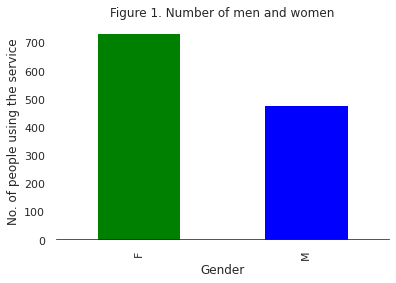

In [61]:
%matplotlib inline 
#Here I make it so the graphs will be shown in phython. 
import seaborn as sns  #here I import the package seaborn for grpahs 
import matplotlib.pyplot as plt #here I import another packsge mathplotlib needed to use seaborn
sns.set()

fvsm= v.plot(kind = 'bar', color = ['green', 'blue'])   
fvsm.set_title('Figure 1. Number of men and women')

plt.xlabel("Gender")
plt.ylabel("No. of people using the service")
fvsm.set_facecolor('white')
plt.axhline(0, color='black')




There are nearly double the amount of women than men in the services. This is very interesting to me. 
I am curious to understand why this may be the case. 

First I wonder if perhaps age is the reason for this? There is a general trend around the world that women live longer. Therefore, maybe the extra women are all the older women. 



In [62]:
agemvsf = new.groupby('Gender_y', as_index=True).Age.mean()
agemvsf


Gender_y
F    76.400545
M    69.688935
Name: Age, dtype: float64

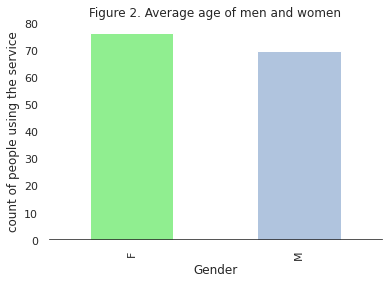

In [63]:


Agemvsf = agemvsf.plot(kind = 'bar', color = ['lightgreen', 'lightsteelblue'])
Agemvsf.set_title('Figure 2. Average age of men and women')

plt.xlabel("Gender")
plt.ylabel("count of people using the service")
Agemvsf.set_facecolor('white')
plt.axhline(0, color='black')



As can be seen in Table above, and figure 2, women are older than men on average. However, the mean difference is not that much, approximately 6 years. 

I will check if the difference is significant. 

In [64]:
import pandas as pd

import scipy.stats as stats

In [68]:
females = new.loc[new['Gender_y'] == 'F']  ###i make two new datasets seperated by gender for t test analysis

In [69]:
males = new.loc[new['Gender_y'] == 'M']

In [70]:
females['Age']
males['Age']

45      85.0
46      42.0
47      96.0
48      65.0
49      88.0
        ... 
1206    74.0
1207    31.0
1210    73.0
1211    69.0
1212    73.0
Name: Age, Length: 479, dtype: float64

In [71]:
stats.ttest_ind(females['Age'], males['Age'], equal_var=True, nan_policy = 'omit') ####Here I run an independent t tets


Ttest_indResult(statistic=5.3906512765697725, pvalue=8.432419448272456e-08)

There is a significant difference in age between the men and women. Women are statistically significantly older. 
This could be why there are more women in the service.

However, for this to be true, there would be more women in the older categories. 

I will look at the distrbution of ages. 

See figure 4 and 5 below


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


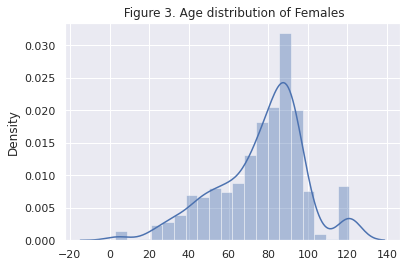

In [72]:
%matplotlib inline 
#Here I make it so the graphs will be shown in phython. It would be annoying if every graph was downloaded
import seaborn as sns  #here I import the package seaborn for grpahs 
import matplotlib.pyplot as plt #here I import another packsge mathplotlib needed to use seaborn
sns.set()

agef = sns.distplot([females['Age']])   
agef.set_title(' Figure 3. Age distribution of Females')  # Here I add the title

    
plt.show() 

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, ' Figure 4. Age distribution of Males')

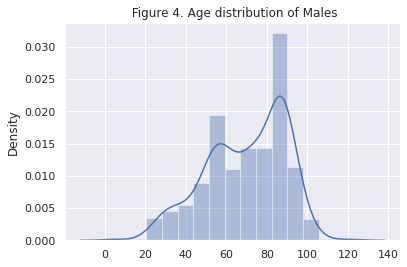

In [73]:
agem = sns.distplot([males['Age']])    #Here I make the first plot  of tips
agem.set_title(' Figure 4. Age distribution of Males')

When I look at these figures, it seems actually that there are more men in the younger age categories and the peak is a little later in the women. 

I decide to look at the men and women in different age categories so that it will be easier to see and understand. 

In [72]:
bins= [0,18,30,40,50,60,70,80,90,100,110,121]
labels = ['child','18-30','30s','40s', '50s', '60s', '70s', '80s', '90s', '100s', '110+']
new['AgeGroup']  = pd.cut(new['Age'], bins=bins, labels=labels, right=False)
print (new)
####first, I add age bins column and added it to my new dataframe


      ExternalID  External ID Gender_y   Age    CareSysCondition AgeGroup
0         4703.0       4703.0        F  56.0        Spina Bifida      50s
1         4704.0       4704.0        F  81.0                COPD      80s
2         4706.0       4706.0        F  90.0            Dementia      90s
3         4707.0       4707.0        F  39.0        Brain Injury      30s
4         4708.0       4708.0        F  90.0                 NaN      90s
...          ...          ...      ...   ...                 ...      ...
1209      9586.0       9586.0        F  89.0            Dementia      80s
1210      9594.0       9594.0        M  73.0  Multiple Sclerosis      70s
1211      9600.0       9600.0        M  69.0                 NaN      60s
1212         NaN       9604.0        M  73.0                COPD      70s
1213         NaN       9605.0        F  54.0                 NaN      50s

[1214 rows x 6 columns]


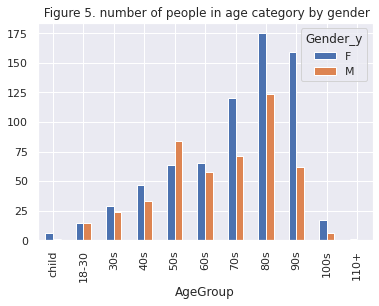

In [73]:
agegender= new.groupby(["AgeGroup", 'Gender_y']).size().unstack(level=1).plot(kind='bar')
agegender.set_title(' Figure 5. number of people in age category by gender')
plt.show()

The graph above is interesting because it shows at the younger ages, there are similar numbers of men and women. Then in the 50s category there are more men. From the 60s, there are more women, and the gap between the number of men and women tends to increase with age. 
This suggests that the larger number of women in the service is because women live longer. 

Another reason why there may be more women in the service, is because certain conditions/health problems are more common in women. 

Below I explore the health conditions by gender. 

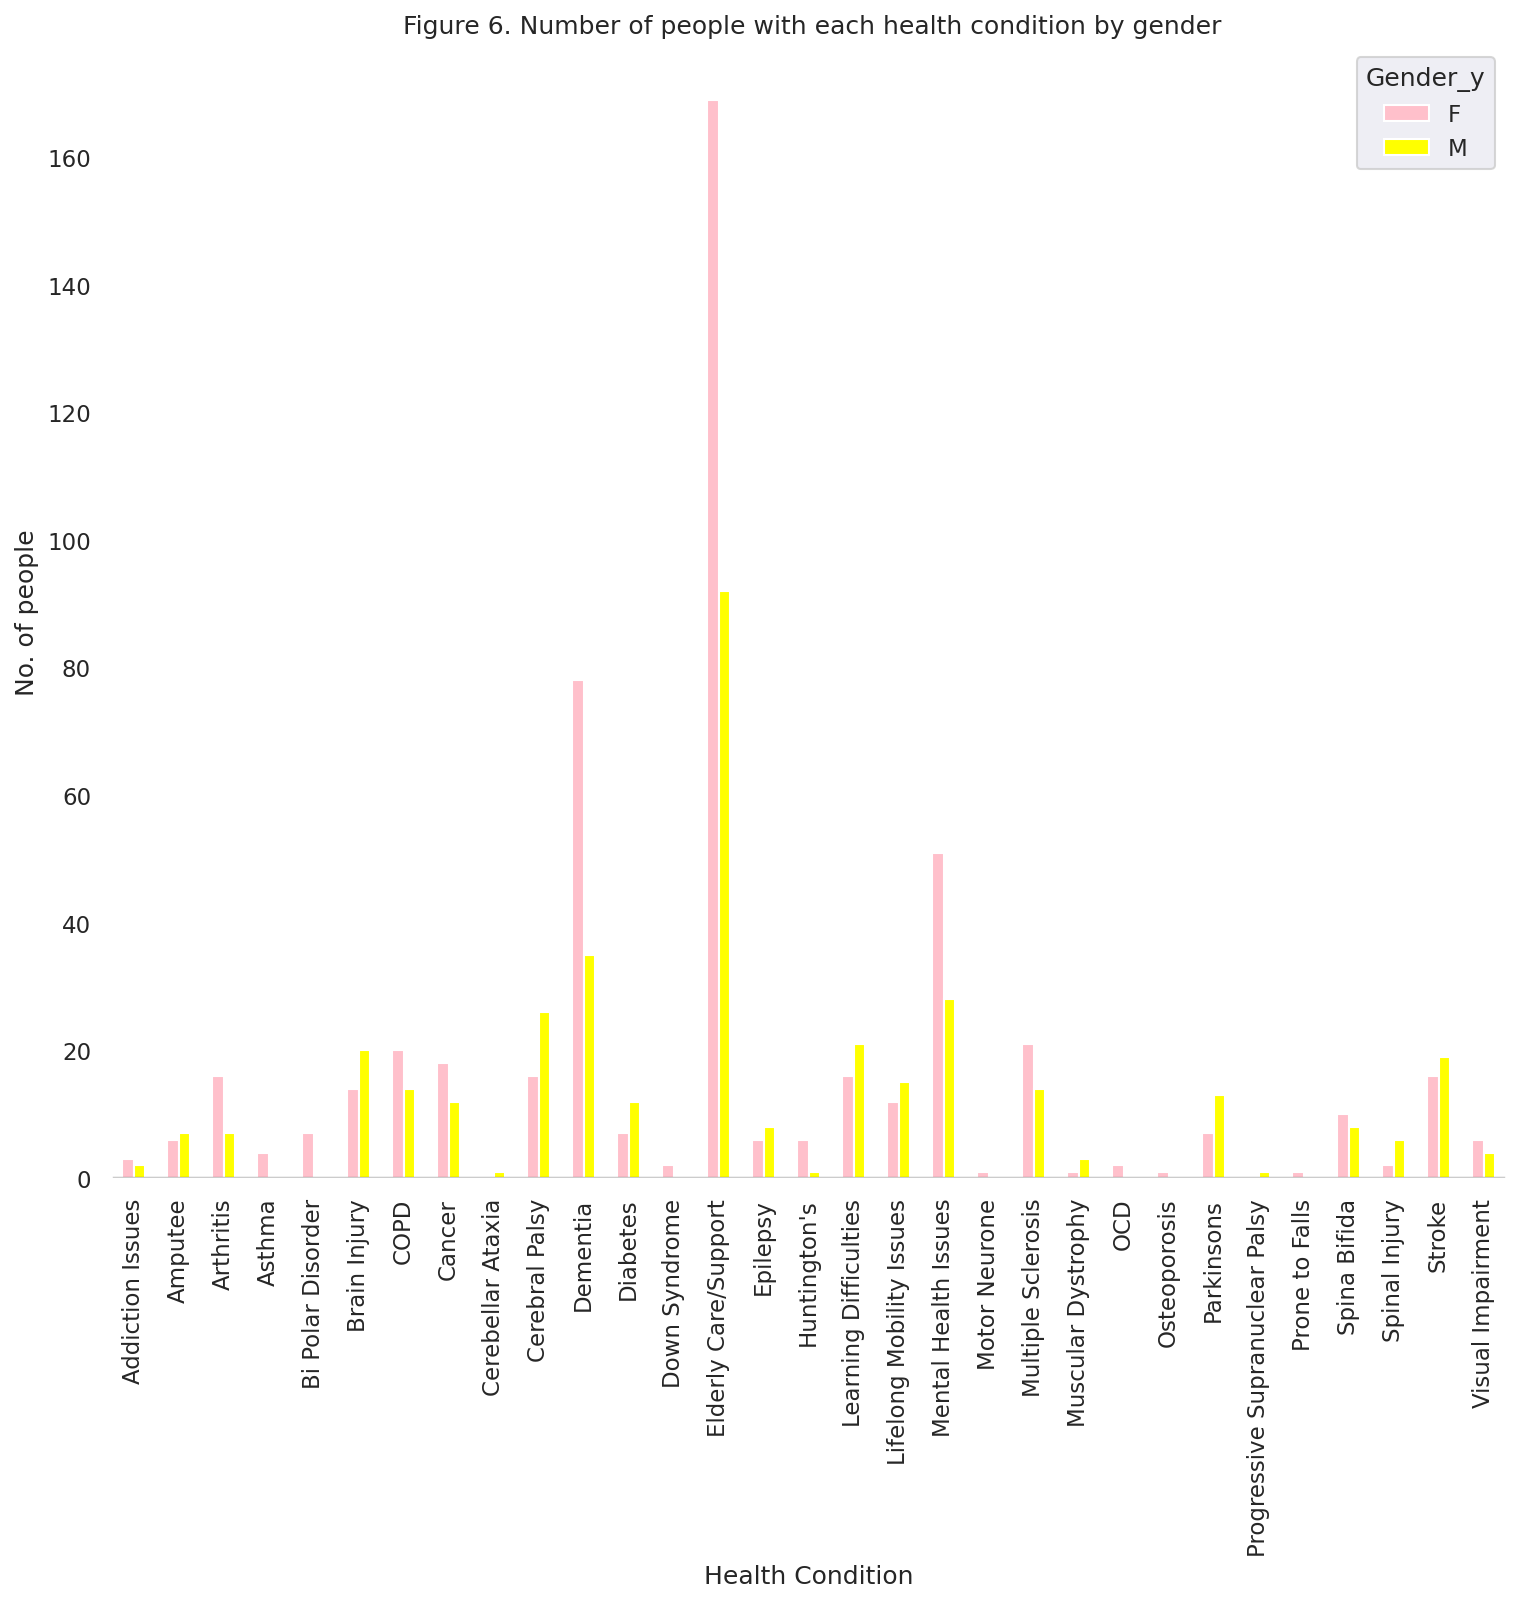

In [75]:
plt.rcParams['figure.figsize'] = [12, 10]    #Here I make it bigger to see the graph 
plt.rcParams['figure.dpi'] = 150

conditiongender = new.groupby(['CareSysCondition', "Gender_y"]).size().unstack(level=1).plot(kind='bar', color = ['pink', 'yellow'])
conditiongender.set_title(' Figure 6. Number of people with each health condition by gender')



plt.xlabel("Health Condition")
plt.ylabel("No. of people")
conditiongender.set_facecolor('white')
plt.axhline(0, color='black')

plt.show()

The above graph shows the number of people with certain conditions by gender. 

Again, it confirms that the larger number of women can be accounted for in the elderly category and the dementia (associated with older age) category. 

Interesting, it seems there may be another reason why there are more women in the service,  possibly because more women have mental health issues. 

Overall, it seems that there are more women in the service as women live longer and are more liklely to have mental health issues. 

In [ ]:
End of Explore

Start of Reflection and hypotheses: 

The data was very interesting in terms of understanding the types of people who use the service. People of all ages use the services although the distribution of ages shows a leftward skew meaning older people use the services more than younger people. The number of people in each age category increases as age increase. I was initally surprised there were some children however, I understand how sometimes there may be an emergency and no where else for them to go. There are more women in the service than men, almost double. This seems to be mostly because women live longer. There are a range of disabilites the company provides service for, the most common is elderly though. 

Certain conditions were over-represented by a certain genders (see Figure 6).  It would be interesting to perform an Odds Ratio analysis and evaluate the liklihood of each condition depending on gender. For example, more men than women had brain injuries. I would be curious to see if men are more likely to be involved in brain injury accidents and if so, how much more likely. This would be useful for targeting men more in road safety adverts. 

More women in the sample had dementia (Figure 6). However, this could because they live longer. i.e. perhaps dementia is equally common in men and women but men die earlier and therefore the numbers are skewed. To test this, I would do a compare (using a t test) the number of men and women who have dementia at each age group. If there was no difference in the number of women and men who have dementia at younger ages, that would suggest women's over representation is a result of living longer. 


Finally, I did not look at location of the homes. The range of disablities is wide. I would be surprised if all these disabilites were in the same homes. I suspect certain homes provide services for people with groups of similar disabilities. I would do a network analysis to see if certain disabilites group together into certain homes or areas. It would be useful for the company to understand what people's disbilties and needs were in certain homes, so that they could allocate resources appropriately. 



End of Reflection and hypotheses. 